# Facebook matrixnet

Let's construct the TED subtitles dataset.

In [1]:
import re
import numpy as np
import pickle
import pandas as pd
from bs4 import BeautifulSoup
import urllib
import codecs
import os,glob
import glob
import re

from matplotlib import pyplot as plt

### Matrixnet

Matrix is the dataset crawled from the web and aligned with some probability.

https://github.com/facebookresearch/LASER/tree/master/tasks/WikiMatrix

I've taken the 30k+ sentences from it with prob=1.06 to add to the TED dataset for further evaluation.

In [2]:
mn_zh = "D:\\ml\\matrixnet\\WikiMatrix.ru-zh.txt.cn"
mn_ru = "D:\\ml\\matrixnet\\WikiMatrix.ru-zh.txt.ru"
mn_zh_out = "D:\\ml\\matrixnet\\wm_zh.txt"
mn_ru_out = "D:\\ml\\matrixnet\\wm_ru.txt"

In [15]:
from hanziconv import HanziConv

with open(mn_ru, mode='r', encoding='utf-8') as input_ru, open(mn_zh, mode='r', encoding='utf-8') as input_zh, \
        open(mn_ru_out, mode='w', encoding='utf-8') as out_ru, open(mn_zh_out, mode='w', encoding='utf-8') as out_zh:
    zh = input_zh.readlines()
    ru = input_ru.readlines()
    
    count = 0
    for zh,ru in zip(zh,ru):
        count +=1
#         if len(ru.split(' ')) > 3 & len(ru.split(' ')) < 46:
        zh = HanziConv.toSimplified(zh)
        print(ru)
        print(zh)
        if count>15:
            break
        out_ru.write(ru)
        out_zh.write(zh)

Им чужды ложь и неблагодарность».

他们否认控罪。

Степень истины означает степень, с которой утверждение истинно.

恕者，即本于其内在之忠。

Збраньки (укр.

但被其否认。

Но вам лучше поститься, если бы вы только знали!

斋戒对于你们更好，如果你们知道。

Он отверг такое утверждение.

后来这个推论被否认。

Любознательность (любознательность — любовь к знанию) приводит познающие разумные, и осознающие свою разумность, существа к знанию.

人物 宗室仁寿，清朝睿僖亲王。

(«Мир!

郑亮，郑安世子。

В ней — осуждение тех, которые отрицали Коран.

惟当事人已否认。

(Когда человек) клянется, (заведомо) меняя известное, явное, (например), о каменном столбе (говорит), что он золотой .

掷金立誓一事，从此传闻于乡里，成为美谈。

Ступайте же по земле и посмотрите, каким был конец неверующих.

故你们当在大地上旅行，应当观察否认（使者）的人们的结局是怎样的。

Мы не только превратили их в плотоядных (животных), мы превратили их в каннибалов.

我曾降大雨去伤他们，你看看犯罪者的结局是怎样的。

Ведь Аллах над всем сущим властен.

真主对于万事确是全能的。

根岸 孝旨 Нэгиси Такамунэ) (Dr.StrangeLove) — бас; Гота Ясики (яп.

孟津大誓，常预同德之臣；咸阳违约，克赞先登之主。

Группа 13 имела также собст

In [9]:
out_ru

<_io.TextIOWrapper name='D:\\ml\\matrixnet\\wm_ru.txt' mode='w' encoding='utf-8'>

In [4]:
len_zh = list(map(lambda x: len(x), [x for x in zh if len(x) < 200]))
len_ru = list(map(lambda x: len(x), [x for x in ru if len(x) < 100]))

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 55.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
        0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
        0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
        0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
        0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
        1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.

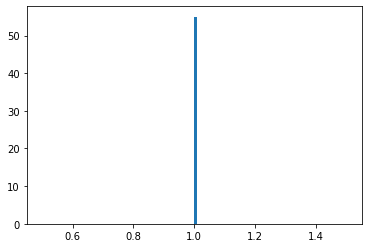

In [5]:
plt.hist(len_zh, bins=100)

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0., 222.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
        0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
        0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
        0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
        0.94, 0.95, 0.

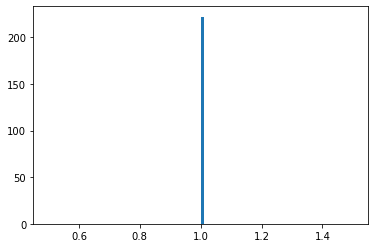

In [6]:
plt.hist(len_ru, bins=100)

In [1]:
#Seems to e traditional characters.